#  1. Import Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm


# 2. Load Dataset

In [21]:
# Load training data
dataset = pd.read_csv("train.csv")

# Preview the data
print(dataset.head())
print("Dataset shape:", dataset.shape)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

# 3. Data Type Summary

In [22]:
# Identify categorical and numerical columns
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (dataset.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (dataset.dtypes == 'float64')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 43
Integer variables: 35
Float variables: 3


#4. Correlation Heatmap

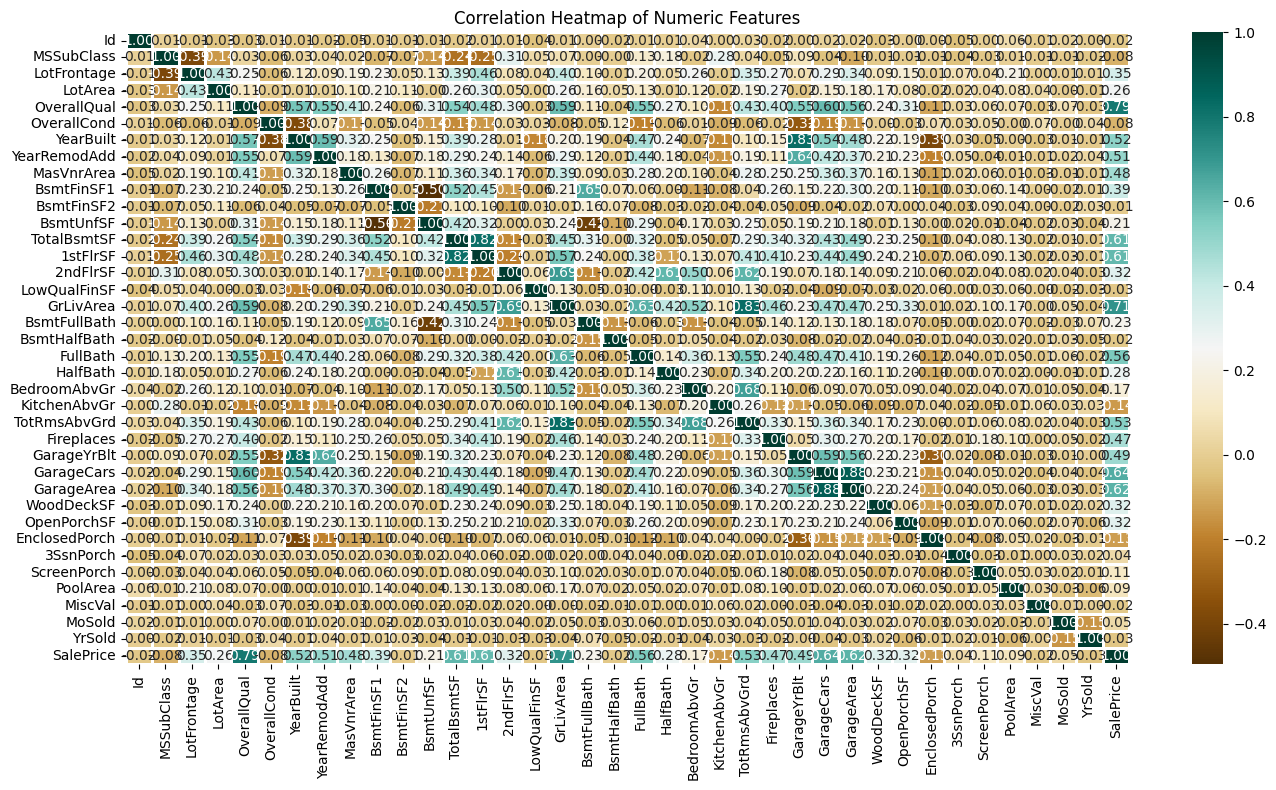

In [23]:
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(14, 8))
sns.heatmap(numerical_dataset.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

#5. Unique Value Counts for Categorical Features

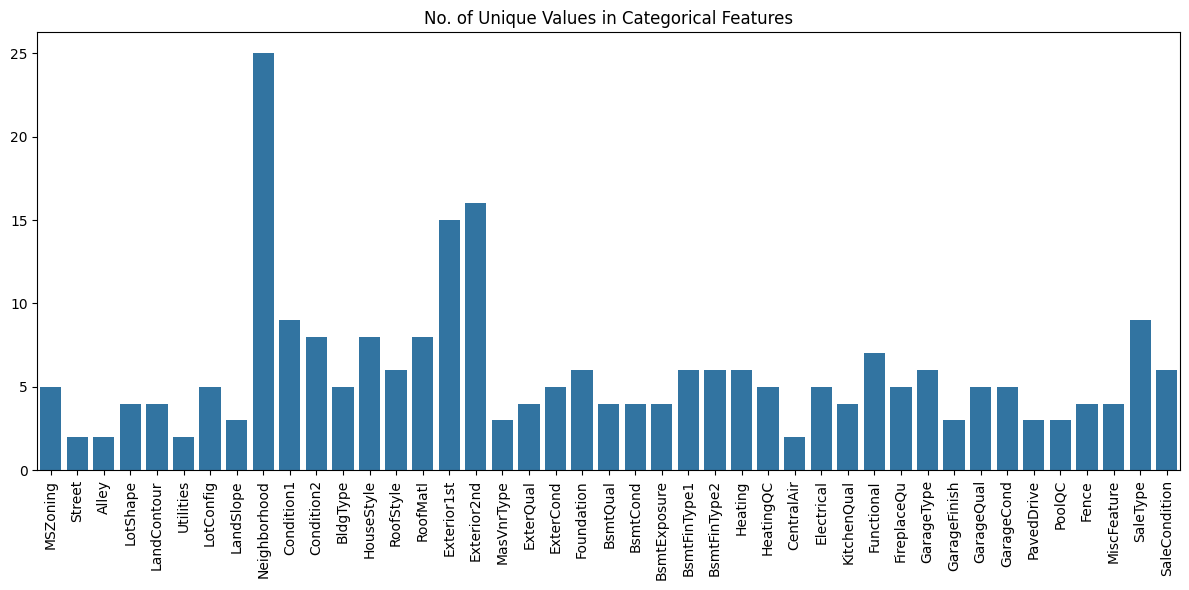

In [24]:
unique_values = [dataset[col].nunique() for col in object_cols]

plt.figure(figsize=(12, 6))
sns.barplot(x=object_cols, y=unique_values)
plt.title("No. of Unique Values in Categorical Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 6. Categorical Feature Distributions

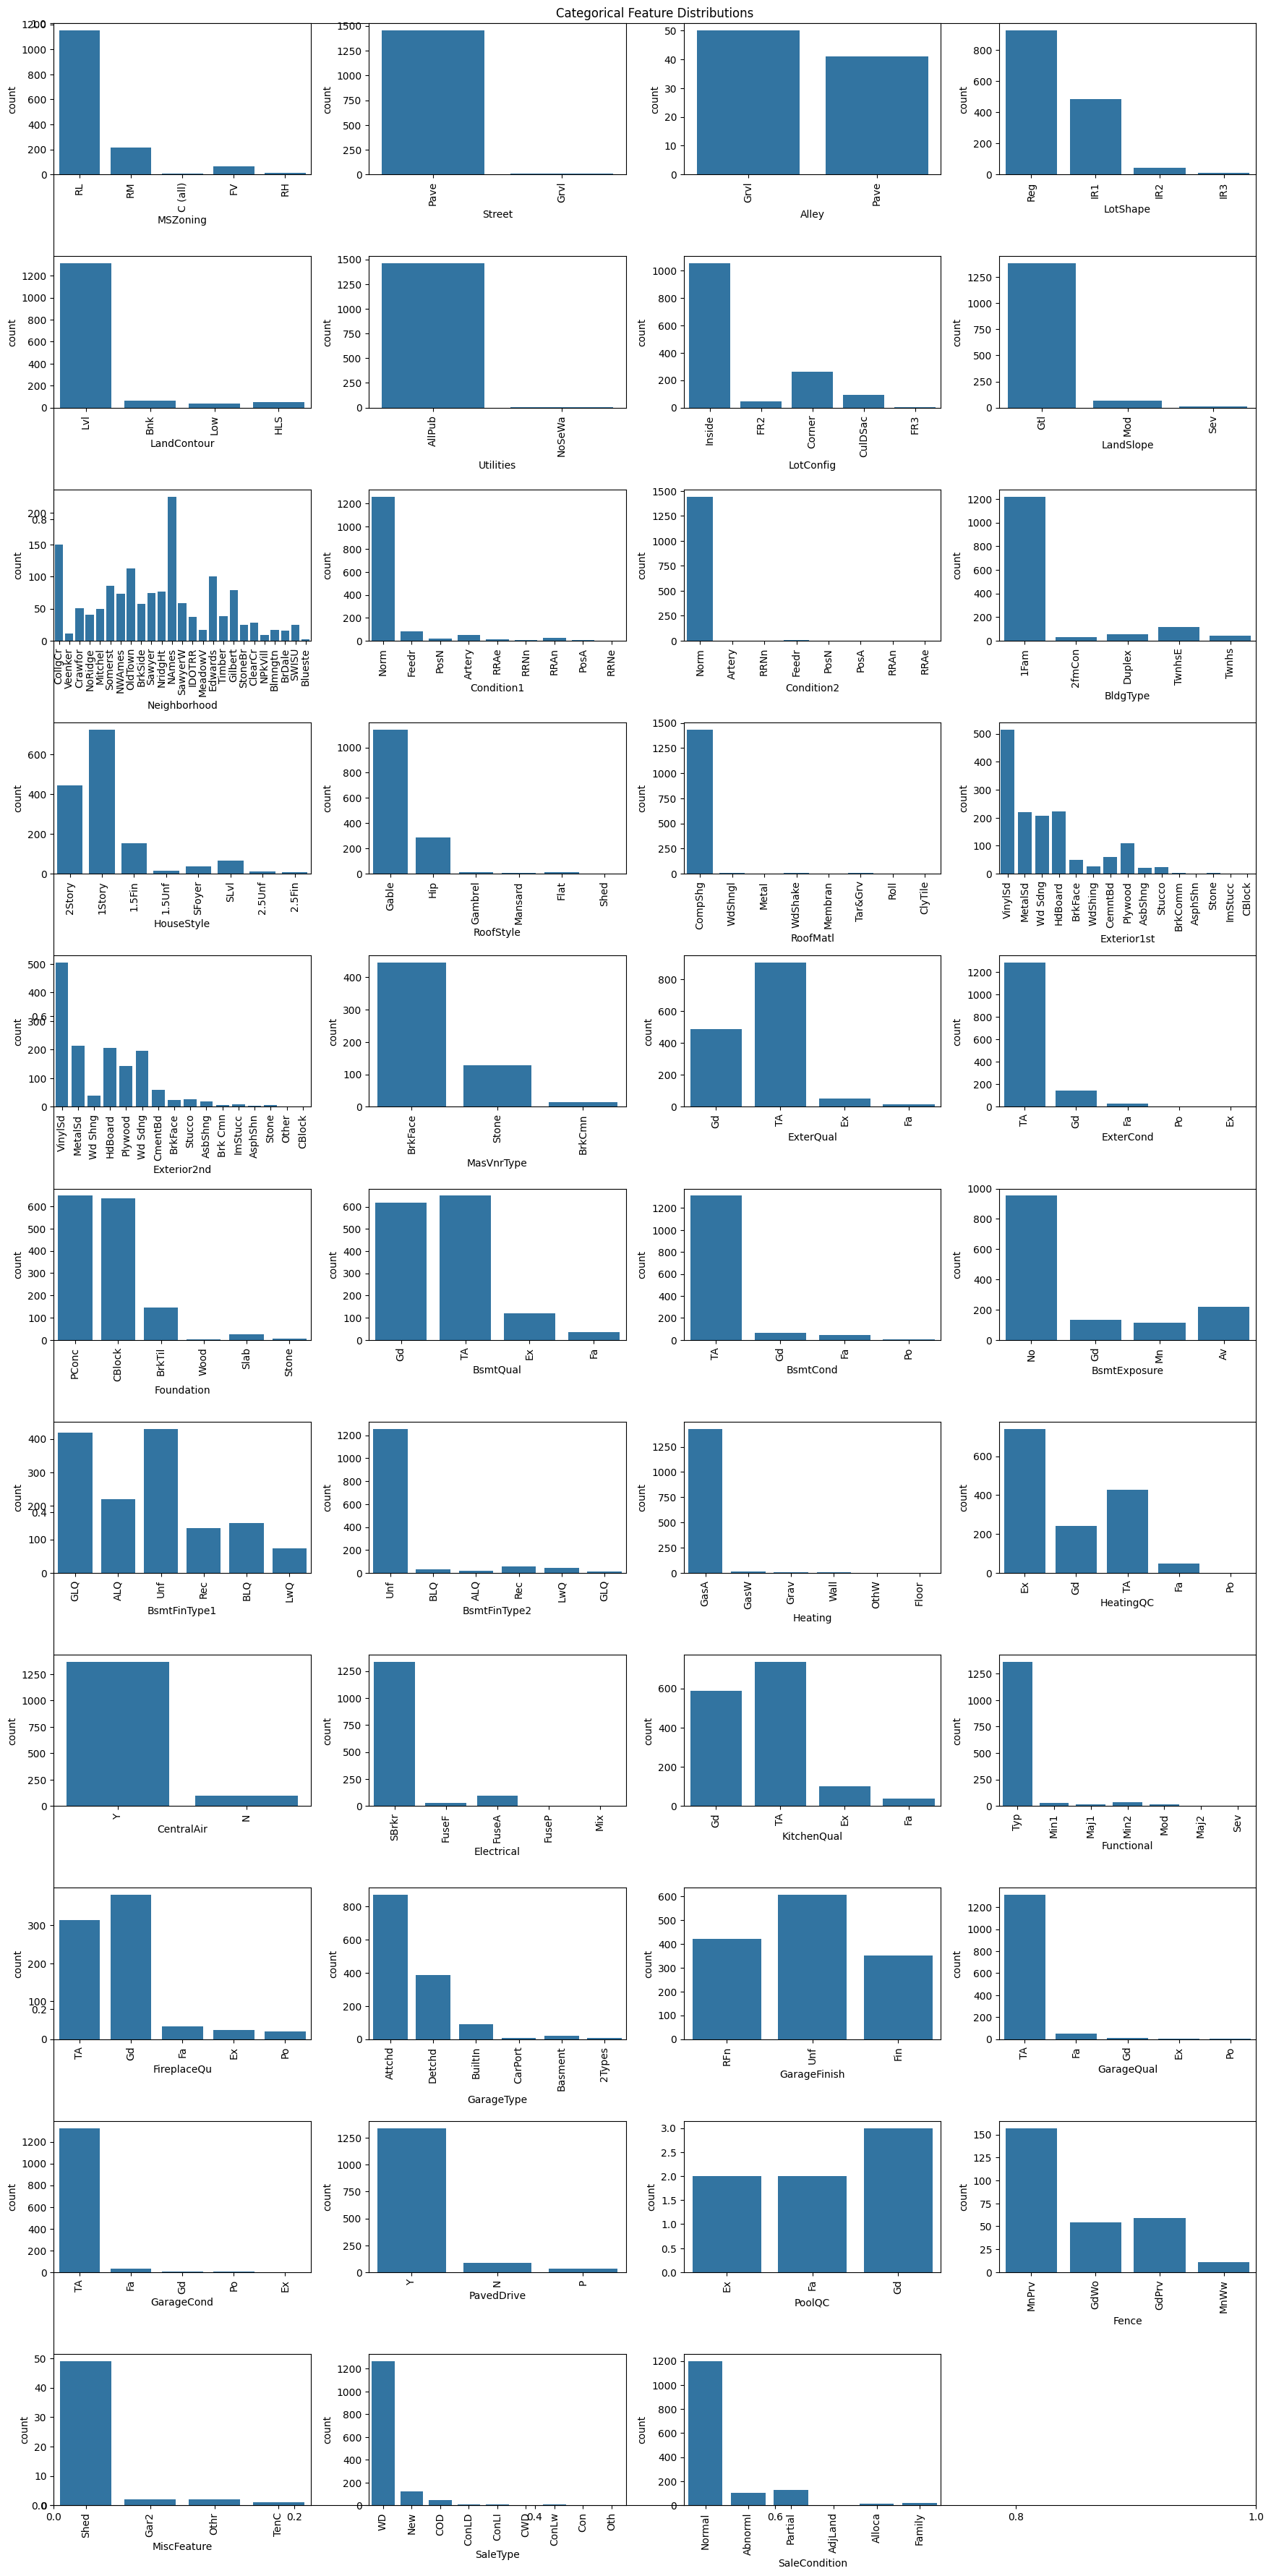

In [25]:
plt.figure(figsize=(18, 36))
plt.title("Categorical Feature Distributions")
for idx, col in enumerate(object_cols):
    plt.subplot((len(object_cols) // 4 + 1), 4, idx + 1)
    sns.countplot(data=dataset, x=col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 7.Drop Unneeded Columns + Handle Missing Value

In [26]:
# 1. Handle missing values
new_dataset = dataset.copy()

# Fill categorical columns with 'Missing'
for col in new_dataset.select_dtypes(include='object').columns:
    new_dataset[col] = new_dataset[col].fillna('Missing')

# Fill numeric columns with median
for col in new_dataset.select_dtypes(include=['int64', 'float64']).columns:
    new_dataset[col] = new_dataset[col].fillna(new_dataset[col].median())

# 2. Drop ID column
new_dataset.drop("Id", axis=1, inplace=True)

# 3. Identify categorical columns
object_cols = new_dataset.select_dtypes(include='object').columns.tolist()
print("Categorical columns for encoding:", object_cols)

Categorical columns for encoding: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# 8. One-Hot Encode Categorical Columns

In [27]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)

# Merge encoded columns back
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


#  9. Train-Test Split

In [36]:
X = df_final.drop('SalePrice', axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, random_state=0)


#  10. Model 1: Support Vector Regressor (SVR)

In [30]:
model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred_svr = model_SVR.predict(X_valid)

print("SVR MAPE:", mean_absolute_percentage_error(Y_valid, Y_pred_svr))


SVR MAPE: 0.300964895791829


#  11. Model 2: Random Forest Regressor

In [31]:
model_RFR = RandomForestRegressor(n_estimators=100, random_state=0)
model_RFR.fit(X_train, Y_train)
Y_pred_rfr = model_RFR.predict(X_valid)

print("Random Forest MAPE:", mean_absolute_percentage_error(Y_valid, Y_pred_rfr))


Random Forest MAPE: 0.09679576596842249


# 12. Model 3: Linear Regression

In [32]:
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred_lr = model_LR.predict(X_valid)

print("Linear Regression MAPE:", mean_absolute_percentage_error(Y_valid, Y_pred_lr))


Linear Regression MAPE: 0.13614348258142317


# 13. Predict on test set for submission

In [42]:
test_data = pd.read_csv("test.csv")
test_ids = test_data["Id"]
test_data.drop("Id", axis=1, inplace=True)
# Fill missing values in test
for col in test_data.select_dtypes(include='object').columns:
    test_data[col] = test_data[col].fillna("Missing")
for col in test_data.select_dtypes(include=['int64', 'float64']).columns:
    test_data[col] = test_data[col].fillna(test_data[col].median())
# One-hot encode test data
OH_test = pd.DataFrame(OH_encoder.transform(test_data[object_cols]))
OH_test.index = test_data.index
OH_test.columns = OH_encoder.get_feature_names_out(object_cols)
test_final = test_data.drop(object_cols, axis=1)
test_final = pd.concat([test_final, OH_test], axis=1)
# Align test set to training set (some features might be missing)
test_final = test_final.reindex(columns=X.columns, fill_value=0)

# Predict
final_preds = model_RFR.predict(test_final)

# Prepare submission
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": final_preds
})

submission.to_csv("submission.csv", index=False)
print("✅ submission.csv created")

✅ submission.csv created


In [43]:
dataset = pd.read_csv("submission.csv")

# Preview the data
print(dataset.head())

     Id  SalePrice
0  1461  127232.08
1  1462  154163.50
2  1463  181109.70
3  1464  181309.82
4  1465  198220.00
